# Download Dataset dari Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sriindria","key":"0259f5237d915133ff46050847753060"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d ehababoelnaga/anemia-types-classification

Dataset URL: https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification
License(s): Apache 2.0
  0% 0.00/21.7k [00:00<?, ?B/s]
100% 21.7k/21.7k [00:00<00:00, 20.7MB/s]


In [ ]:
!mkdir anemia-types-classification
!unzip anemia-types-classification.zip -d anemia-types-classification
!ls anemia-types-classification

Archive:  anemia-types-classification.zip
  inflating: anemia-types-classification/diagnosed_cbc_data_v4.csv  
diagnosed_cbc_data_v4.csv


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# Load Dataset

In [ ]:
df = pd.read_csv('anemia-types-classification/diagnosed_cbc_data_v4.csv')

# Eksplorasi Dataset

In [ ]:
# Menampilkan beberapa baris pertama dari dataframe
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [ ]:
# Melihat ukuran dataframe, yaitu jumlah baris dan kolom
print("DataFrame shape :",df.shape)

DataFrame shape : (1281, 15)


In [ ]:
# Menampilkan informasi dari dataset, seperti tipe data, jumlah nilai null serta nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
# Menghitung jumlah nilai yang hilang (NaN atau null)
df.isna().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [ ]:
# Memeriksa apakah ada baris duplikat di dalam dataframe
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1276    False
1277    False
1278    False
1279    False
1280    False
Length: 1281, dtype: bool

# Visualisasi Data

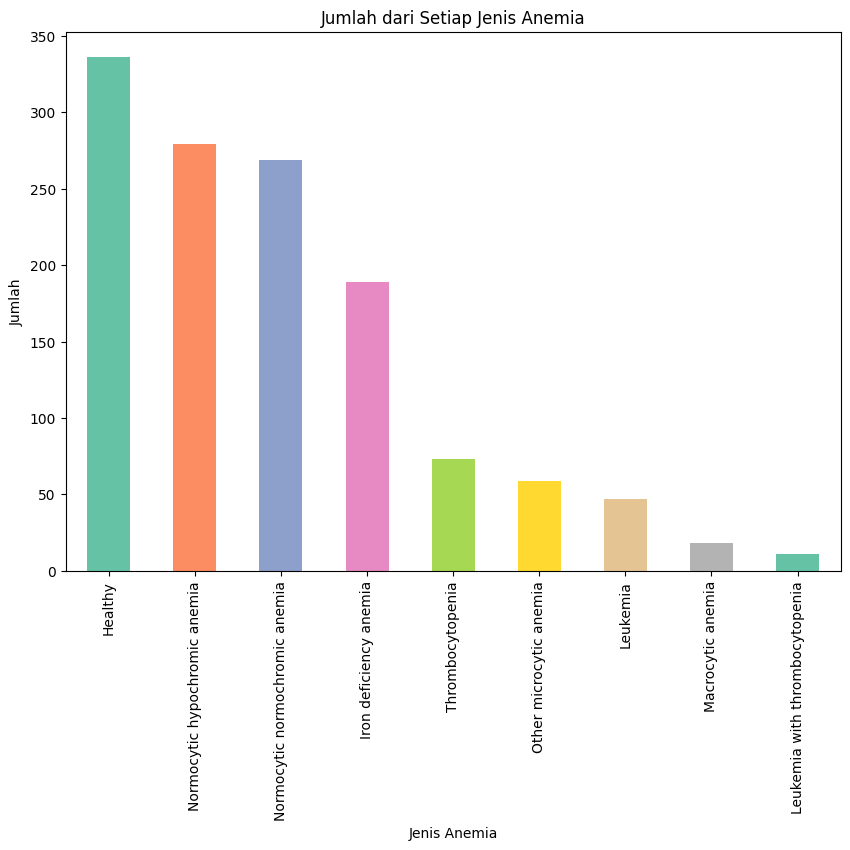

In [ ]:
# Menampilkan jumlah dari setiap jenis anemia
jenis_anemia = df['Diagnosis'].value_counts()

plt.figure(figsize=(10, 7))
jenis_anemia.plot(kind='bar', color=plt.cm.Set2.colors)
plt.title('Jumlah dari Setiap Jenis Anemia')
plt.xlabel('Jenis Anemia')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

# Data Cleaning

In [ ]:
# Mengidentifikasi kolom numerik dan kolom categorical berdasarkan tipe datanya
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    elif df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)


for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
numerical

['WBC',
 'LYMp',
 'NEUTp',
 'LYMn',
 'NEUTn',
 'RBC',
 'HGB',
 'HCT',
 'MCV',
 'MCH',
 'MCHC',
 'PLT',
 'PDW',
 'PCT']

In [ ]:
catgcols

['Diagnosis']

# Data Preparation

In [ ]:
# Memisahkan kolom fitur dan label
ind_col = [col for col in df.columns if col != 'Diagnosis']
dep_col = 'Diagnosis'

In [ ]:
# Mengubah data categorical menjadi numerik
le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col].values)

In [ ]:
# Menampilkan data teratas setelah diubah
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,5
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,5
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,1
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,1
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,5


In [ ]:
# Memisahkan kolom fitur dan label
X = df.drop(labels=['Diagnosis'], axis=1).values
y = df['Diagnosis']

In [ ]:
# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Modeling

In [ ]:
# Inisiasi model
model = Sequential()

# Layer ANN
model.add(Dense(128, activation='relu', input_dim=X.shape[-1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [ ]:
# Menampilkan ringkasan dari arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 9)                 297       
                                                                 
Total params: 12553 (49.04 KB)
Trainable params: 12553 (49.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


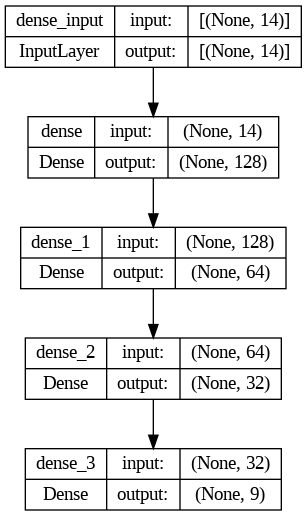

In [ ]:
# Menampilkan plot model
plot_model(model, show_shapes = True)

In [ ]:
# Kompilasi Model
optim = Adam(lr=0.001)

model.compile(
    optimizer=optim,
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
    )

In [ ]:
# Pelatihan model
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=50,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/50
921/921 [==============================] - 6s 4ms/step - loss: 3.2783 - Accuracy: 0.2953 - val_loss: 1.7427 - val_Accuracy: 0.4078
Epoch 2/50
921/921 [==============================] - 3s 3ms/step - loss: 1.8555 - Accuracy: 0.3529 - val_loss: 1.8334 - val_Accuracy: 0.3592
Epoch 3/50
921/921 [==============================] - 3s 3ms/step - loss: 1.7419 - Accuracy: 0.3789 - val_loss: 1.7450 - val_Accuracy: 0.4078
Epoch 4/50
921/921 [==============================] - 3s 3ms/step - loss: 1.6795 - Accuracy: 0.4072 - val_loss: 1.8730 - val_Accuracy: 0.3786
Epoch 5/50
921/921 [==============================] - 3s 3ms/step - loss: 1.5828 - Accuracy: 0.3974 - val_loss: 1.6102 - val_Accuracy: 0.4563
Epoch 6/50
921/921 [==============================] - 4s 4ms/step - loss: 1.5082 - Accuracy: 0.4419 - val_loss: 6.2913 - val_Accuracy: 0.4369
Epoch 7/50
921/921 [==============================] - 3s 3ms/step - loss: 1.5499 - Accuracy: 0.4723 - val_loss: 1.6942 - val_Accuracy: 0.4272
Epoch 

In [ ]:
# Hasil Akurasi
pred = np.argmax(model.predict(X_test), axis=1)
print(accuracy_score(y_test, pred))

9/9 [==============================] - 0s 2ms/step
0.7859922178988327


# Save Model

In [ ]:
# Menyimpan model ANN ke dalam file
model.save('./anemiatypes.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Konversi model ke TensorFlow Lite
model = tf.keras.models.load_model('./anemiatypes.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./anemiatypes.tflite", "wb").write(tflite_model)

16776